# Load Balancing Problem

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
def flatten(lists):
    flat_list = []
    for row in lists:
        flat_list.extend(row)
    return flat_list

def draw_assigned(assigned: list(list((str, int)))):
    """
    Parameters
    ----------
    """
    machines = [f"Machine {i}" for i in range(len(assigned))]
    t = [[job[1] for job in assigned_jobs] for assigned_jobs in assigned]
    t = flatten(t)
    min, max = np.min(t), np.max(t)
    
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    # ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, assigned_jobs in enumerate(assigned):
        labels = [f"{job[0]}: {job[1]}" for job in assigned_jobs]
        widths = [job[1] for job in assigned_jobs]
        starts = [sum(widths[:i]) for i in range(len(assigned_jobs))]
        print(labels, widths, starts)
        rects = ax.barh([machines[i]] * len(labels), widths, left=starts, height=0.5,
                        label=labels, color=mpl.colormaps["winter"](np.linspace(0, 1, len(labels))))

        text_color = 'white'
        ax.bar_label(rects, labels=labels, label_type='center', color=text_color)

    return fig, ax

def greedy_solution(m, jobs: list[(str, int)]):
    """
         Attributes
        ----------
        m : int
            machine size
        jobs: list[int]
            job list
    """
    assigned = [[] for i in range(m)]
    L = [0] * m
    for j, (name, t) in enumerate(jobs):
        i = np.argmin(L)
        assigned[i].append((name, t))
        L[i] = L[i] + t

    return assigned, max(L)


## Exercise 3-1

Create two examples where the obtained makespan T is always
the same as T * . (Easy examples for the greedy algorithm).

### Example 3-1-1

['J_1: 2', 'J_3: 2'] [2, 2] [0, 2]
['J_2: 2', 'J_4: 2'] [2, 2] [0, 2]


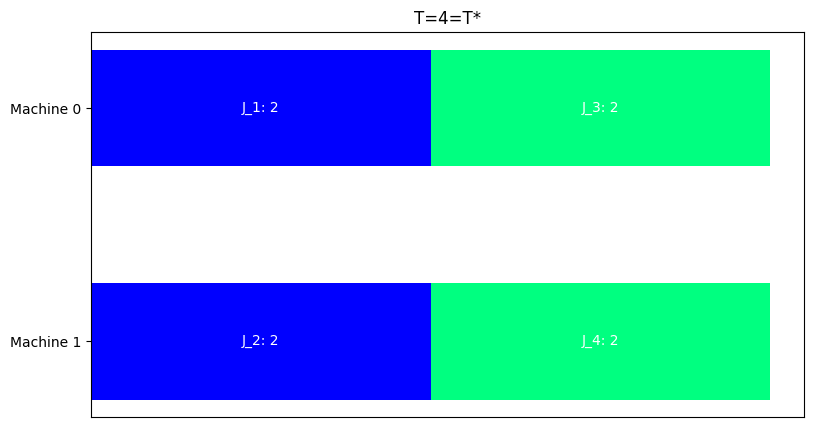

In [56]:

def gen_equal_jobs(num, t, prefix="J"):
    jobs = []
    for i in range(num): 
        jobs.append((f"{prefix}_{i+1}", t))
    return jobs

equal_jobs = gen_equal_jobs(4, 2)

equal_jobs_assigned, equal_jobs_T = greedy_solution(2, equal_jobs)

draw_assigned(equal_jobs_assigned)
plt.title(f"T={equal_jobs_T}=T*")
plt.show()

### Example 3-1-1

['Job1: 2', 'Job3: 2'] [2, 2] [0, 2]
['Job2: 2', 'Job4: 3'] [2, 3] [0, 2]


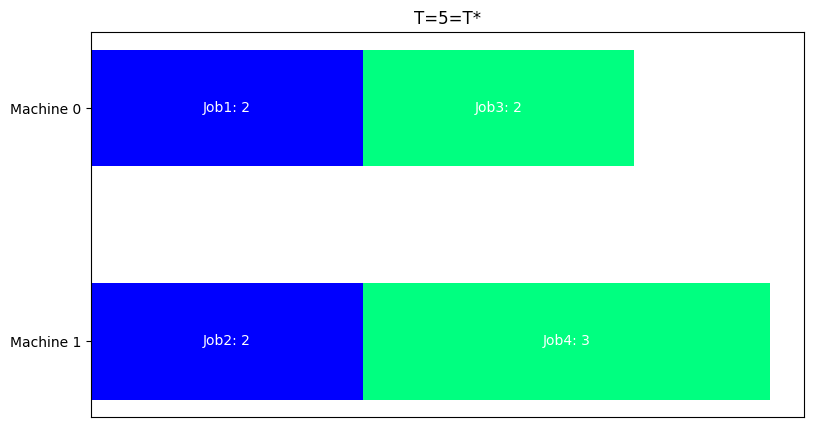

In [57]:

complex_jobs = [
    ["Job1", 2],
    ["Job2", 2],
    ["Job3", 2],
    ["Job4", 3],
]

complex_jobs_assigned, complex_jobs_T = greedy_solution(2, complex_jobs)

draw_assigned(complex_jobs_assigned)
plt.title(f"T={complex_jobs_T}=T*")
plt.show()

## 

### Example 3-2-1

['Job1: 1', 'Job3: 3'] [1, 3] [0, 1]
['Job2: 2', 'Job4: 4'] [2, 4] [0, 2]


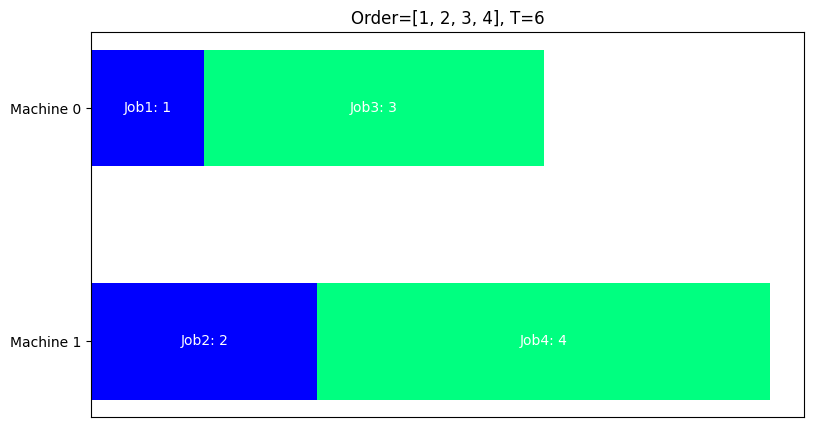

['Job1: 4', 'Job4: 1'] [4, 1] [0, 4]
['Job2: 3', 'Job3: 2'] [3, 2] [0, 3]


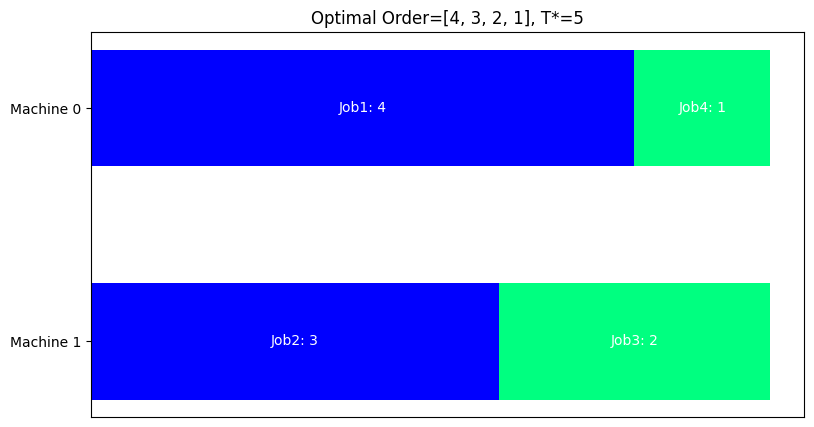

In [58]:

order_simple_jobs = [
    ["Job1", 1],
    ["Job2", 2],
    ["Job3", 3],
    ["Job4", 4],
]

order_simple_jobs_assigned, order_simple_jobs_T = greedy_solution(2, order_simple_jobs)

draw_assigned(order_simple_jobs_assigned)
plt.title(f"Order=[1, 2, 3, 4], T={order_simple_jobs_T}")
plt.show()


order_simple_jobs = [
    ["Job1", 4],
    ["Job2", 3],
    ["Job3", 2],
    ["Job4", 1],
]

order_simple_jobs_assigned, order_simple_jobs_T = greedy_solution(2, order_simple_jobs)

draw_assigned(order_simple_jobs_assigned)
plt.title(f"Optimal Order=[4, 3, 2, 1], T*=5")
plt.show()

### Example 3-2-2

['Job1: 3', 'Job3: 2', 'Job5: 1'] [3, 2, 1] [0, 3, 5]
['Job2: 3', 'Job4: 2', 'Job6: 1'] [3, 2, 1] [0, 3, 5]


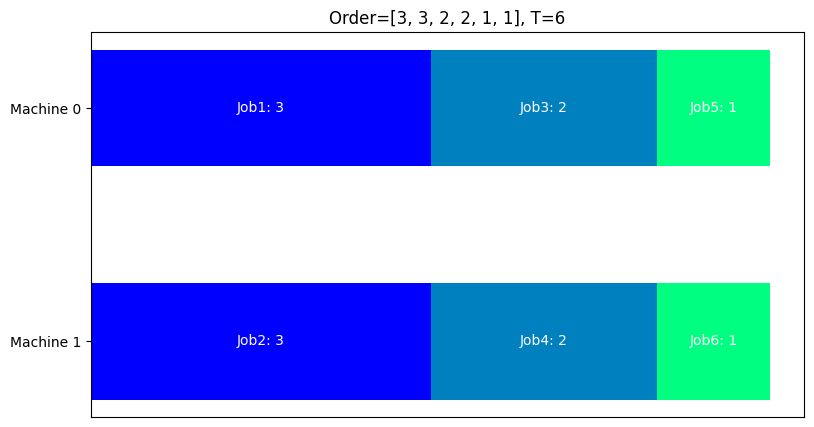

['Job1: 1', 'Job3: 2', 'Job5: 3'] [1, 2, 3] [0, 1, 3]
['Job2: 1', 'Job4: 2', 'Job6: 3'] [1, 2, 3] [0, 1, 3]


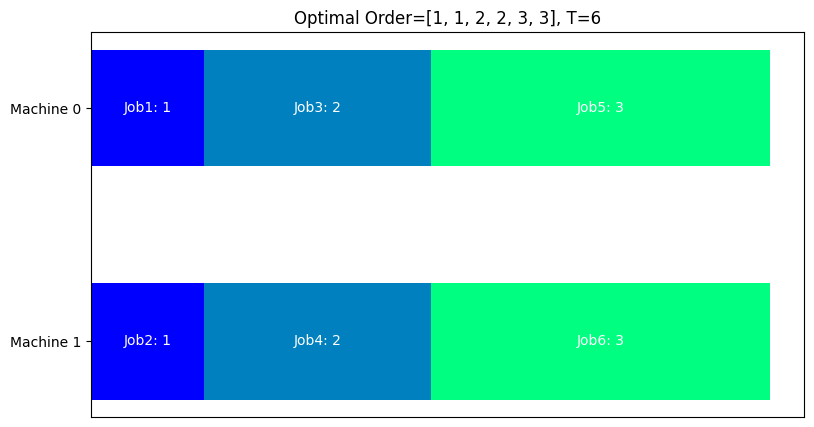

In [63]:


order_complex_jobs = [
    ["Job1", 3],
    ["Job2", 3],
    ["Job3", 2],
    ["Job4", 2],
    ["Job5", 1],
    ["Job6", 1],
]

order_complex_jobs_assigned, order_complex_jobs_T = greedy_solution(2, order_complex_jobs)

draw_assigned(order_complex_jobs_assigned)
plt.title(f"Order=[3, 3, 2, 2, 1, 1], T={order_complex_jobs_T}")
plt.show()


order_complex_jobs = [
    ["Job1", 1],
    ["Job2", 1],
    ["Job3", 2],
    ["Job4", 2],
    ["Job5", 3],
    ["Job6", 3],
]

order_complex_jobs_assigned, order_complex_jobs_T = greedy_solution(2, order_complex_jobs)

draw_assigned(order_complex_jobs_assigned)
plt.title(f"Optimal Order=[1, 1, 2, 2, 3, 3], T={order_complex_jobs_T}")
plt.show()